# 类别型变量线性回归

#### 分别用独热编码（One-hot）和哑（ Dummy ）变量对分类/类别变量进行线性回归

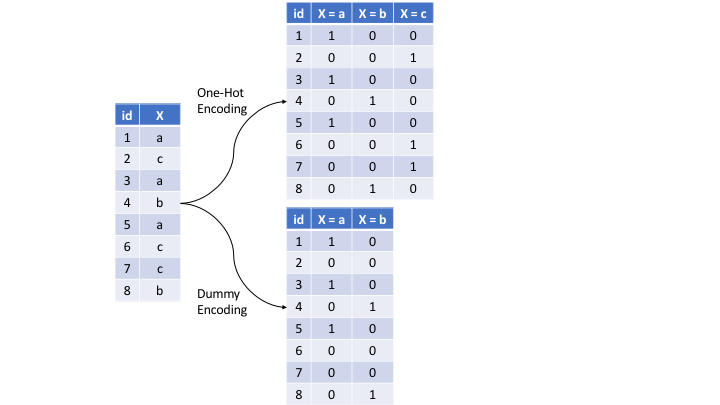

In [1]:
import pandas as pd
from sklearn import linear_model

In [11]:
pd.__version__

'1.3.4'

In [2]:
df = pd.DataFrame({'City': ['SF', 'SF', 'SF', 'NYC', 'NYC', 'NYC', 'Seattle', 'Seattle', 'Seattle'],
                   'Rent': [3999, 4000, 4001, 3499, 3500, 3501, 2499, 2500, 2501]})
df

,City,Rent
0,SF,3999
1,SF,4000
2,SF,4001
3,NYC,3499
4,NYC,3500
5,NYC,3501
6,Seattle,2499
7,Seattle,2500
8,Seattle,2501


#### 1、将 DataFrame 中的类别变量转换为独热编码，并用线性回归模型拟合数据

In [27]:
# 类别变量转独热编码
one_hot_df = pd.get_dummies(df, prefix=['city'])

one_hot_df

,Rent,city_NYC,city_SF,city_Seattle
0,3999,0,1,0
1,4000,0,1,0
2,4001,0,1,0
3,3499,1,0,0
4,3500,1,0,0
5,3501,1,0,0
6,2499,0,0,1
7,2500,0,0,1
8,2501,0,0,1


In [28]:
# 线性回归模型
lin_reg = linear_model.LinearRegression()

In [29]:
lin_reg.fit(one_hot_df[['city_NYC', 'city_SF', 'city_Seattle']], one_hot_df['Rent'])

LinearRegression()

In [30]:
lin_reg.coef_

array([ 166.66666667,  666.66666667, -833.33333333])

In [31]:
lin_reg.intercept_

3333.3333333333335

In [32]:
# w1: 独热编码变量对应的系数 
# b1: 截距
w1 = lin_reg.coef_
b1 = lin_reg.intercept_
w1, b1

(array([ 166.66666667,  666.66666667, -833.33333333]), 3333.3333333333335)

In [33]:
df['Rent'].mean()

3333.3333333333335

#### 2、在哑变量（虚拟编码）上训练线性回归模型

In [12]:
# 设置参数 drop_first=True 将类别变量转虚拟编码
dummy_df = pd.get_dummies(df, prefix=['city'], drop_first=True)
dummy_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,0,0
4,3500,0,0
5,3501,0,0
6,2499,0,1
7,2500,0,1
8,2501,0,1


dummy_df 现在只有两列了。

In [13]:
lin_reg.fit(dummy_df[['city_SF', 'city_Seattle']], dummy_df['Rent'])

LinearRegression()

In [14]:
lin_reg.coef_

array([  500., -1000.])

In [15]:
lin_reg.intercept_

3500.0

In [19]:
# w2: 哑变量系数
# b2: 截距
w2 = lin_reg.coef_
b2 = lin_reg.intercept_
w2, b2

(array([  500., -1000.]), 3500.0)

**One-hot 和 Dummy 比较**

- 使用独热编码，截距代表目标变量 Rent 的全局平均值，每个城市变量的系数代表该城市的平均租金与全局平均值之间的差异。


- 对于哑变量，截距表示参考类别的响应变量 y 的平均值，在该例子中为城市 NYC。第 i 个特征的系数等于第 i 个类别的平均响应值与参考类别的平均值之间的差。

从下图可以看到两种方法为线性模型产生不同的系数。

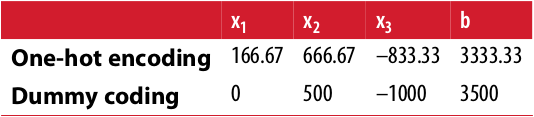

3、效应编码

分类变量编码的另一个变体是效应编码。效应编码与虚拟编码非常相似，区别在于参考类别现在由所有 –1 的向量表示。

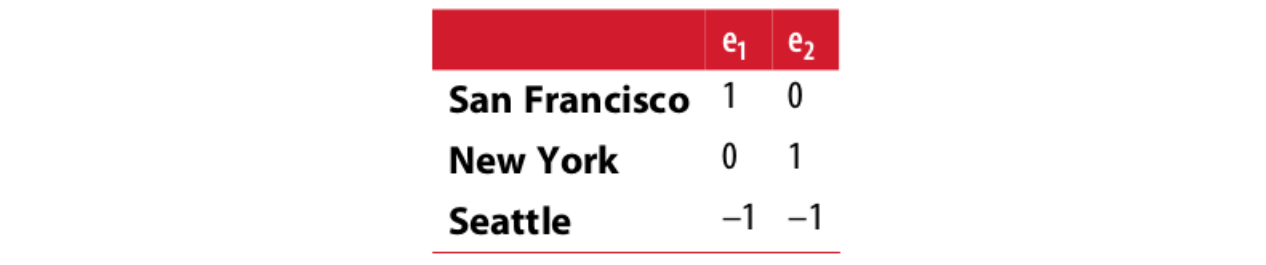

<img src="attachment:image.png" width = "200" height = "200" alt="" align="center"/>

In [20]:
effect_df = dummy_df.copy().astype(int)

In [21]:
effect_df.loc[3:5, ['city_SF', 'city_Seattle']] = -1.0
effect_df

,Rent,city_SF,city_Seattle
0,3999,1,0
1,4000,1,0
2,4001,1,0
3,3499,-1,-1
4,3500,-1,-1
5,3501,-1,-1
6,2499,0,1
7,2500,0,1
8,2501,0,1


In [22]:
lin_reg.fit(effect_df[['city_SF', 'city_Seattle']], effect_df['Rent'])
lin_reg.coef_

array([ 666.66666667, -833.33333333])

In [23]:
lin_reg.intercept_

3333.3333333333335

#### 分类变量编码的优缺点

- 独热编码、虚拟编码和效应编码彼此非常相似。每个编码方法都有优缺点。独热编码是有冗余的，它会导致同一个问题有多个有效模型。非唯一性有时会给解释带来问题，但优点是每个特征能明显对应一个类别。此外，可以**将缺失数据编码为全零向量**，并且输出为目标变量的全局均值。

- 虚拟编码和效应编码消除了冗余性。它们产生了独特且可解释的模型。虚拟编码的缺点是，由于全零向量已映射到参考类别，因此它无法直接处理缺失数据。它还会对每个类别相对于参考类别进行编码，而不是相对于平均情况。

- 效应编码通过为参考类别使用不同的代码来避免此问题，但是所有 -1 的向量都是稠密向量，这对于存储和计算而言代价是高昂的。因此，流行的 ML 软件包（例如 Pandas 和 scikit-learn）选择了虚拟编码或独热编码，而不是效应编码。

不过，当类别的数量变得非常大时，这三种编码技术都不太适合。需要使用不同的策略来处理非常大的类别。

In [24]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.1, color_codes=True)

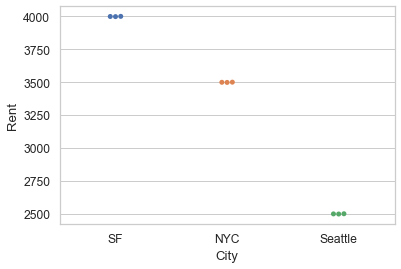

In [25]:
sns.swarmplot(x='City', y='Rent', data=df);

In [34]:
print('独热编码系数: ', w1, '截距: ', b1)
print('虚拟编码系数: ', w2, '截距: ', b2)

独热编码系数:  [ 166.66666667  666.66666667 -833.33333333] 截距:  3333.3333333333335
虚拟编码系数:  [  500. -1000.] 截距:  3500.0


In [38]:
one_hot_df.shape[0], dummy_df.shape[0]

(9, 9)

In [35]:
# one-hot vs. dummy encoding

# 为 one-hot encoding 创建拟合曲线
one_hot_y = [((w1[0] * one_hot_df.city_NYC[i]) + 
              (w1[1] * one_hot_df.city_SF[i]) +
              (w1[2] * one_hot_df.city_Seattle[i]) + b1) 
             for i in range(0, one_hot_df.shape[0])]

# 为 dummy coding 创建拟合曲线
dummy_y = [((w2[0] * dummy_df.city_SF[i]) +
            (w2[1] * dummy_df.city_Seattle[i]) + b2)
           for i in range(0, dummy_df.shape[0])]

print(one_hot_y)
print(dummy_y)

[4000.0000000000005, 4000.0000000000005, 4000.0000000000005, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]
[3999.9999999999995, 3999.9999999999995, 3999.9999999999995, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0]


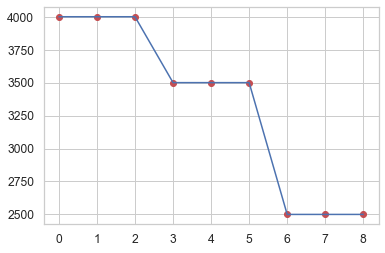

In [40]:
plt.plot(range(0, dummy_df.shape[0]), one_hot_y, 'or');
plt.plot(range(0, dummy_df.shape[0]), one_hot_y, 'b');

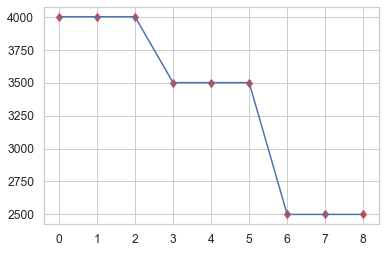

In [42]:
plt.plot(range(0,one_hot_df.shape[0]), one_hot_y, 'dr');
plt.plot(range(0,one_hot_df.shape[0]), one_hot_y, 'b');